In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [4]:
df = pd.read_csv("/Users/nysataneja/Downloads/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
df.shape

(5, 2)

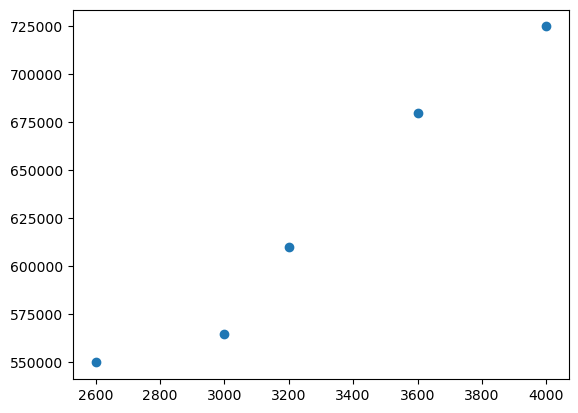

In [7]:
%matplotlib inline 
plt.scatter(df.area, df.price)

In [9]:
linear_regression = linear_model.LinearRegression()
#2d array
#fitting means you are training the model with the available data points
linear_regression.fit(df[['area']], df['price'])


LinearRegression()

In [10]:
linear_regression.predict([[3600]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([669452.05479452])

In [11]:
#m
linear_regression.coef_

array([135.78767123])

In [12]:
#b 
linear_regression.intercept_

180616.43835616432

In [13]:
%matplotlib inline 

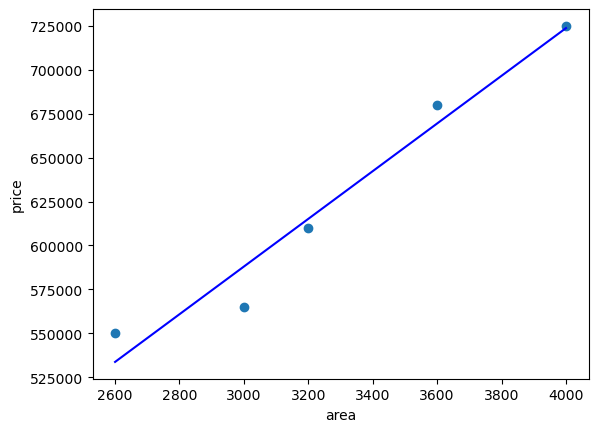

In [12]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price)
plt.plot(df.area, linear_regression.predict(df[['area']]), color='blue')

In [16]:
#classification 
data1 = pd.read_csv("/Users/nysataneja/Downloads/insurance_data.csv")
data1.head(27)


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


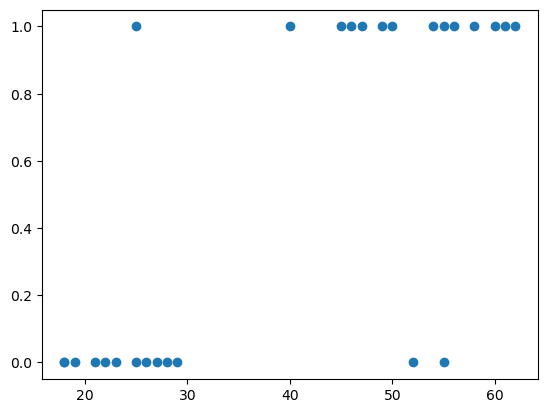

In [17]:
plt.scatter(data1.age,data1.bought_insurance)

In [17]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data1[['age']],data1.bought_insurance,train_size=0.9)
#data1[[age]] is used as a dataframe hence double brackets , its a ffeature
#target = brought.insurance 


In [35]:
X_test

,age
8,62
1,25
18,19


In [36]:
X_train

,age
20,21
22,40
9,61
6,55
21,26
4,46
2,47
16,25
14,49
11,28


In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [38]:
model.fit(X_train, y_train) #training

LogisticRegression()

In [39]:
X_test

,age
8,62
1,25
18,19


In [40]:
y_predicted = model.predict(X_test)
print(y_predicted)

[1 0 0]


In [41]:
model.score(X_test,y_test)

1.0

In [42]:
model.predict([[55]])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [45]:
df = pd.read_csv("/Users/nysataneja/Downloads/salaries.csv")
df.head(30)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [46]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [47]:
target = df['salary_more_then_100k']


In [48]:
#machine learning models can only understand number and not english so we can convert it using lable encoders
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [49]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [50]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [51]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [52]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [53]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [59]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [60]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [61]:
model.score(inputs_n,target)

1.0

In [62]:
#Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
model.predict([[0,2,1]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [63]:
from sklearn.datasets import load_digits
digits = load_digits()

In [64]:
#returns all the features in form of list
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

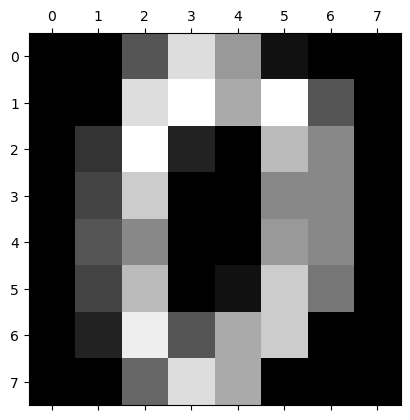

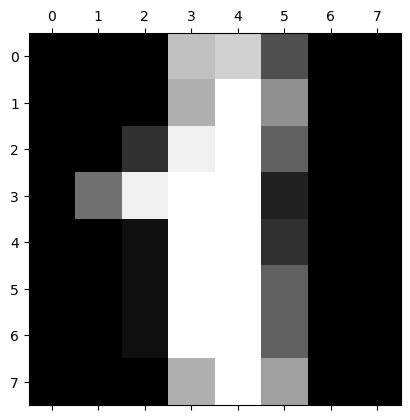

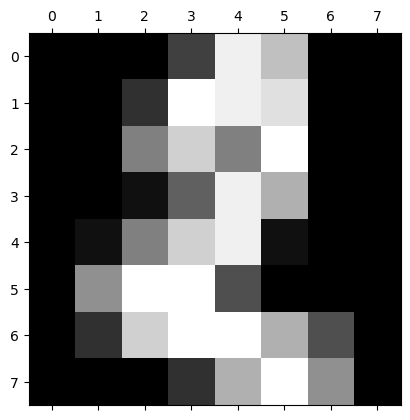

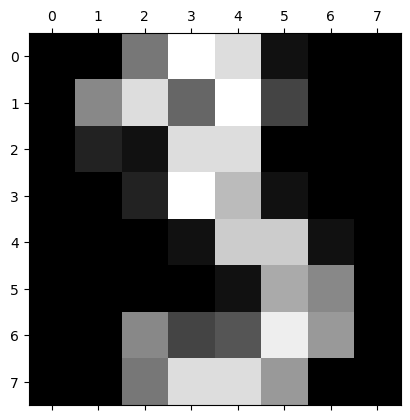

In [65]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [66]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [68]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [69]:
df.shape

(1797, 64)

In [70]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [72]:
df['target'] = digits.target
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [73]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [74]:
X = df.drop('target',axis='columns')
y = df.target

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [81]:
model.score(X_test, y_test)

0.9777777777777777

In [83]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1104,0.0,1.0,11.0,16.0,16.0,10.0,0.0,0.0,0.0,8.0,...,6.0,0.0,0.0,0.0,14.0,16.0,13.0,13.0,16.0,5.0
392,0.0,0.0,1.0,11.0,14.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,11.0,14.0,9.0,0.0,0.0
422,0.0,0.0,10.0,15.0,6.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,9.0,16.0,13.0,4.0,0.0,0.0
1273,0.0,2.0,13.0,16.0,16.0,10.0,0.0,0.0,2.0,15.0,...,8.0,1.0,0.0,2.0,15.0,16.0,16.0,12.0,12.0,1.0
1559,0.0,0.0,1.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.0,0.0,1.0,9.0,16.0,16.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,7.0,0.0,0.0,0.0
450,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,10.0,0.0,0.0,0.0
137,0.0,0.0,2.0,15.0,15.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,12.0,1.0,0.0,0.0,0.0
320,0.0,0.0,1.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,14.0,0.0,0.0,0.0


In [84]:
y_predicted = model.predict(X_test)

In [85]:
print(y_predicted)

[2 6 0 2 4 4 1 8 9 8 3 2 3 4 6 8 8 1 8 9 4 7 4 0 0 5 6 9 7 6 2 3 2 7 1 2 5
 1 2 6 7 6 3 9 0 7 6 4 7 4 5 2 5 1 2 1 0 8 5 6 7 9 3 1 1 6 4 3 8 5 7 1 6 9
 0 4 3 2 3 8 1 4 0 8 6 2 2 7 4 7 7 0 3 2 0 6 7 3 8 1 8 3 5 6 7 9 4 3 0 2 2
 5 0 5 9 3 9 4 2 3 8 2 3 0 6 1 7 1 4 2 9 2 0 1 6 2 5 0 1 1 0 3 6 8 0 7 3 1
 7 4 5 3 1 9 4 6 8 9 3 1 5 1 8 8 5 8 7 1 9 9 9 4 6 4 2 7 4 7 4 2]


In [112]:
from sklearn.datasets import load_iris
iris = load_iris()

In [113]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [116]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [117]:
df.shape

(150, 5)

In [118]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [119]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [120]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [121]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

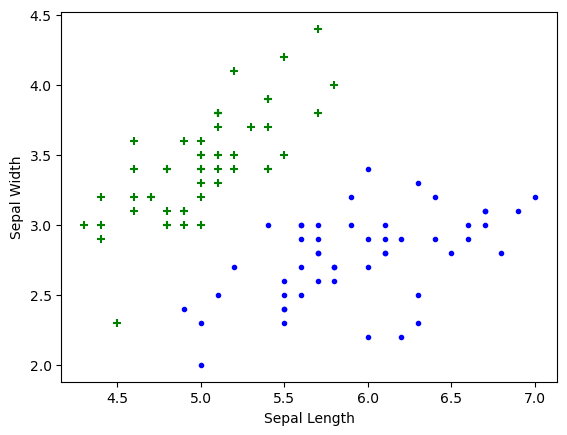

In [122]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


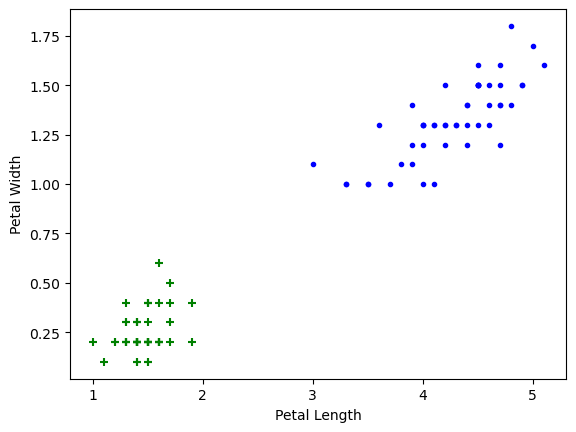

In [123]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [126]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [128]:
len(X_train)

120

In [129]:
len(X_test)

30

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [135]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [136]:
knn.score(X_test, y_test)

1.0

In [137]:
knn.predict([[5.0,3.6,1.4,0.2]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])